In [1]:
%matplotlib widget
import numpy as np
import scipy
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img_dir = "E:/research_data/2022_harmonic_gravity_waves/preprocessed_images/full_ims/"

In [3]:
img_file = img_dir + "d20180211_t0837310_e0838555_b01206_c20220322193857300143_log_image.png"

In [4]:
img = Image.open(img_file)

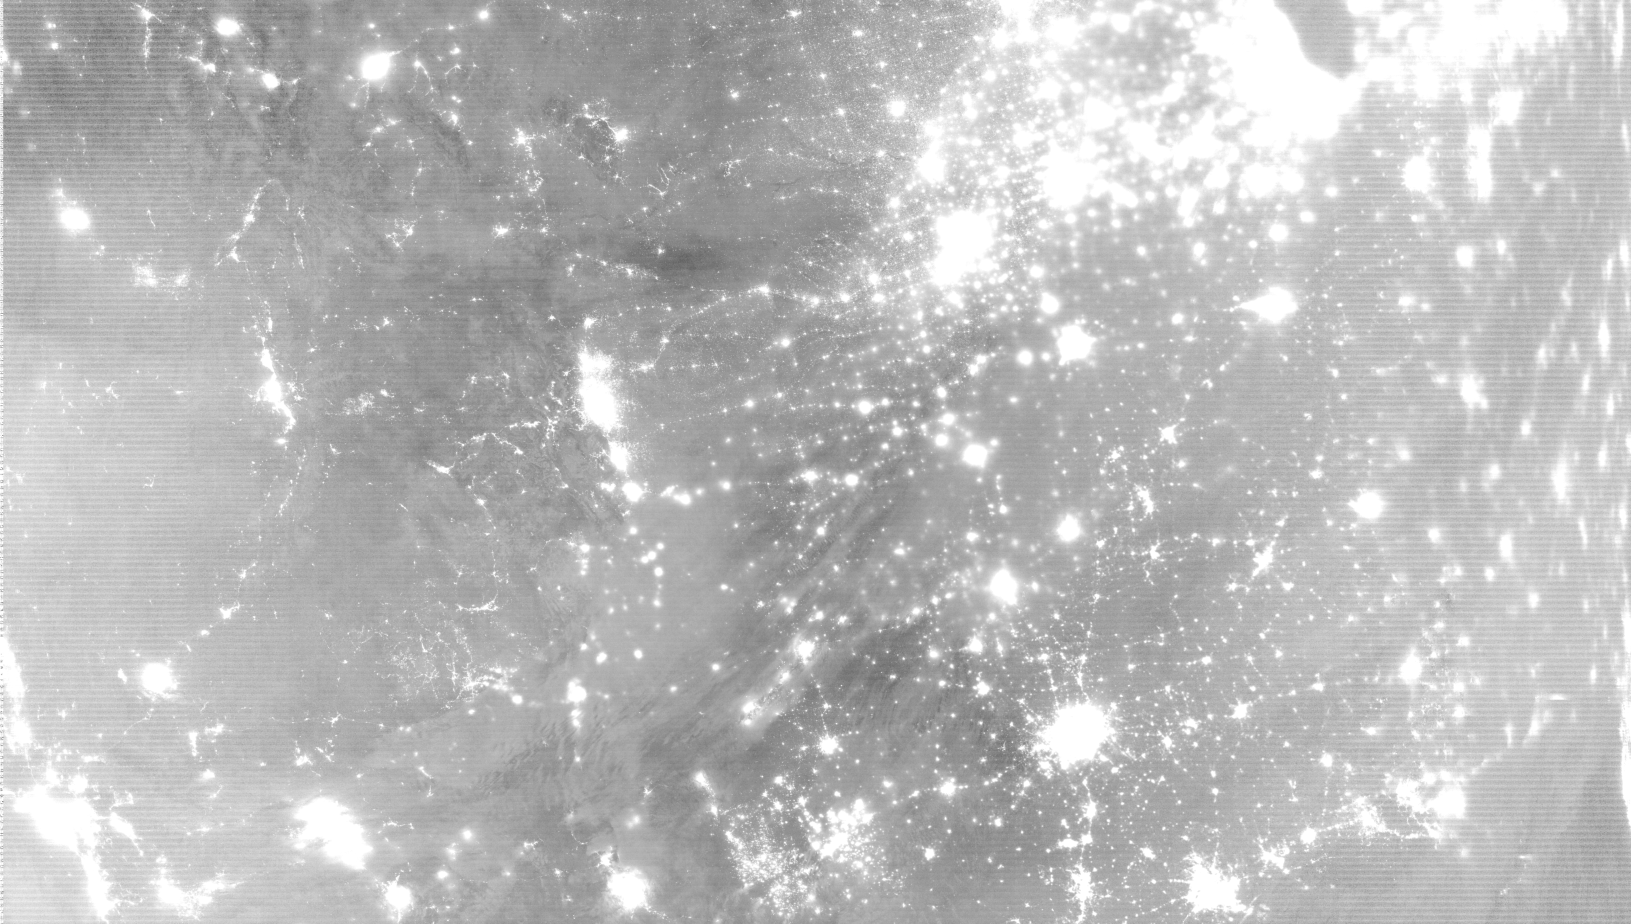

In [5]:
img.convert("L")

In [6]:
img_array = np.asarray(img.convert("L"))

In [7]:
img_array.shape

(924, 1631)

In [57]:
def col_denoise(column, freq_center):
    col_transform = scipy.fft.rfft(column)
    window = scipy.signal.windows.general_gaussian(31, 2, 2)
    filt_func = np.ones(len(col_transform))
    filt_func[freq_center-16:freq_center+15] = 1 - window
    cut_col_transform = col_transform.copy() * filt_func
    cut_col = scipy.fft.irfft(cut_col_transform)
    return cut_col

In [63]:
denoised_img_array = np.zeros(img_array.shape)
for i in range(img_array.shape[1]):
    denoised_img_array[:, i] = col_denoise(img_array[:, i], 143)

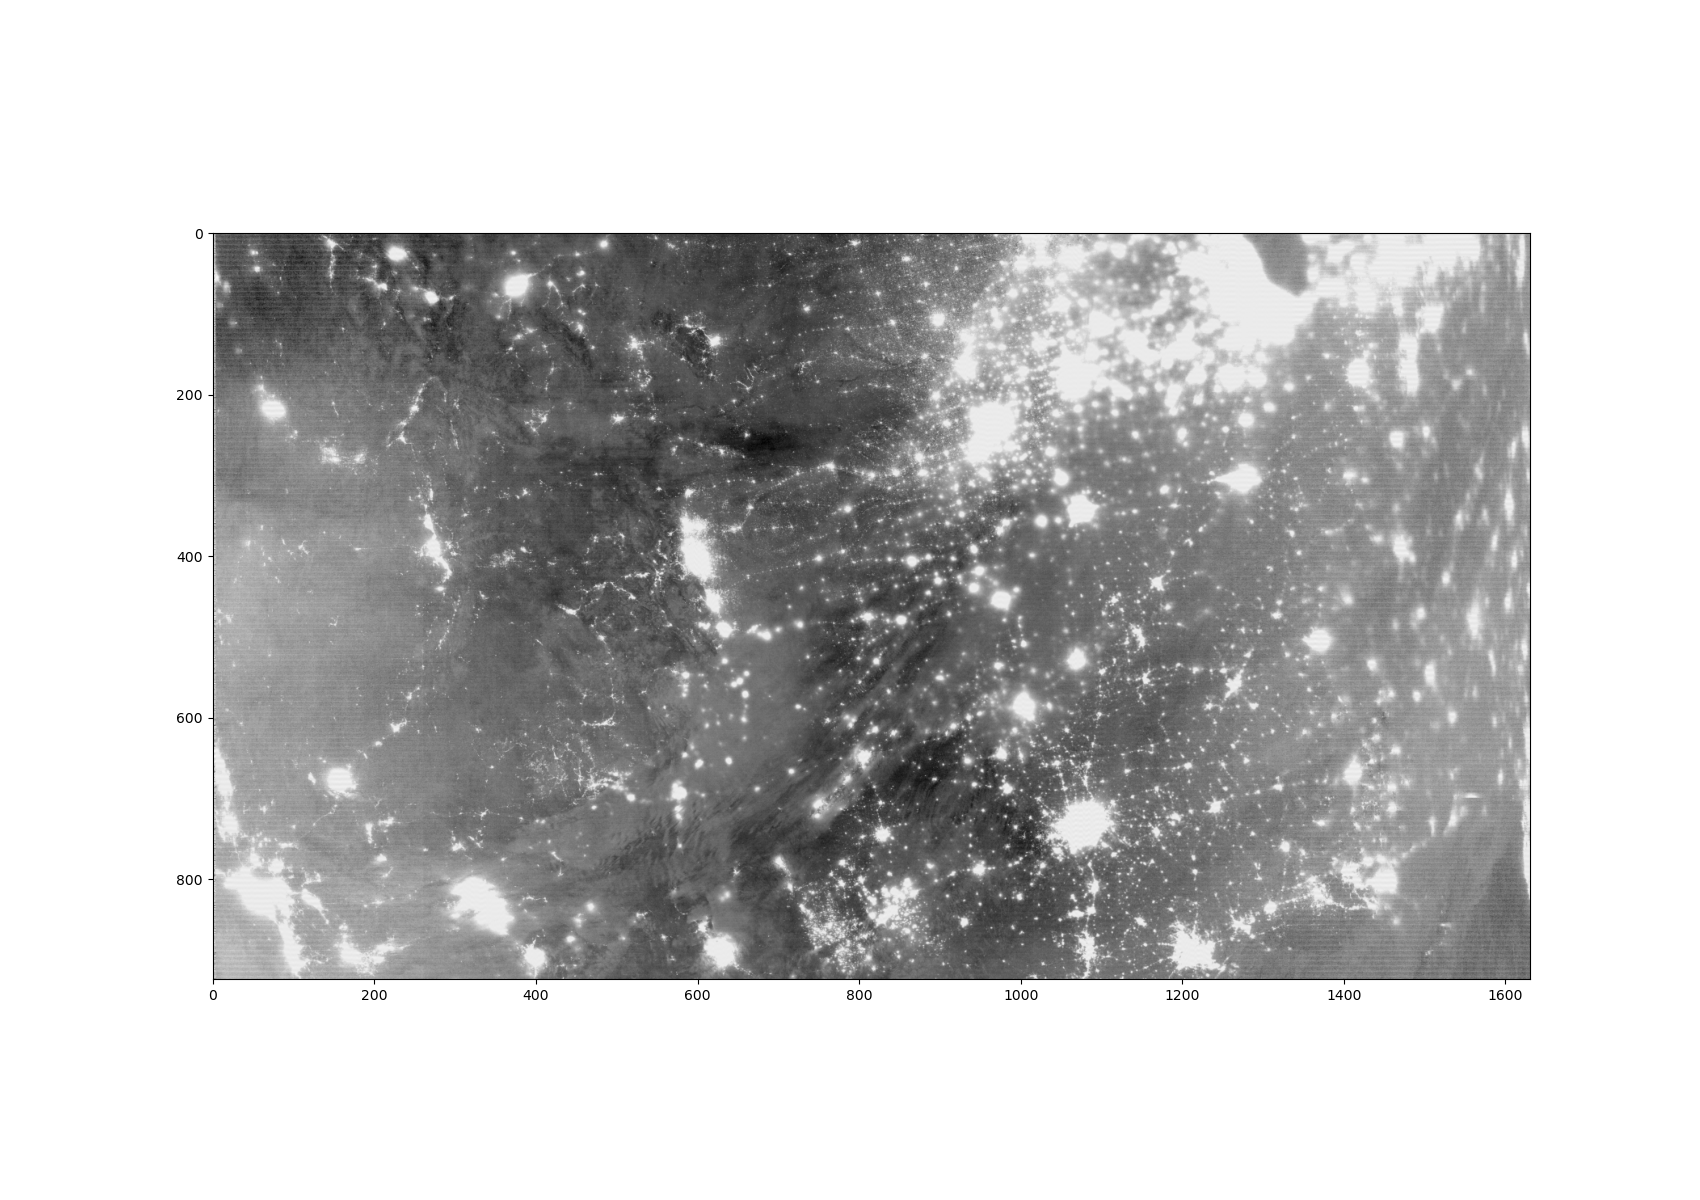

In [67]:
F, ax = plt.subplots(figsize=(17, 12))
ax.imshow(denoised_img_array, cmap='gray')

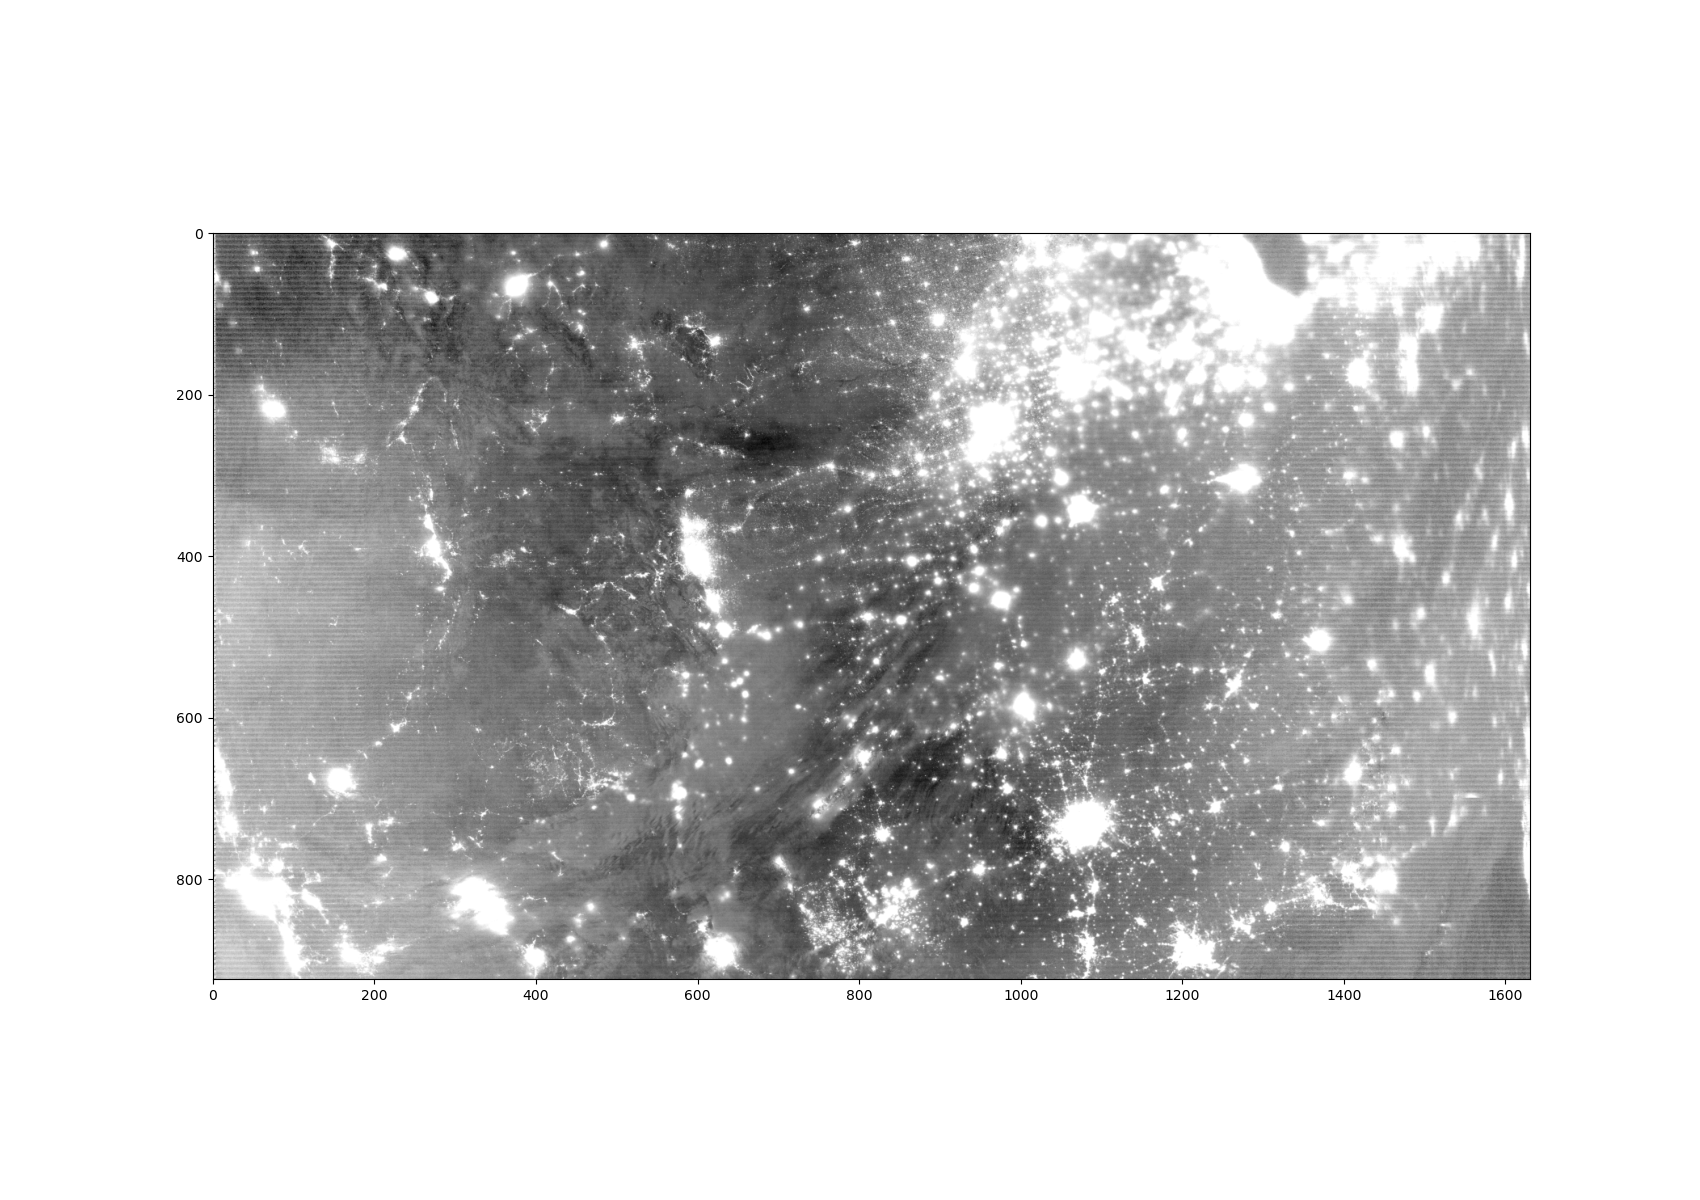

In [68]:
F, ax = plt.subplots(figsize=(17, 12))
ax.imshow(img_array, cmap='gray')

In [59]:
cut_col = col_denoise(img_array[:, 40], 143)

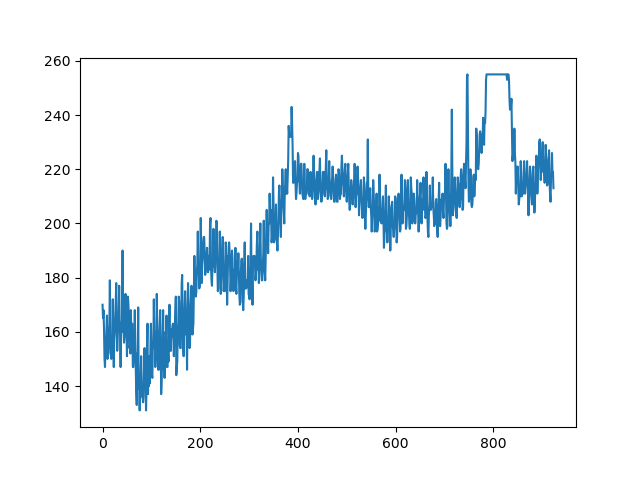

In [60]:
F, ax = plt.subplots()
ax.plot(img_array[:, 40])

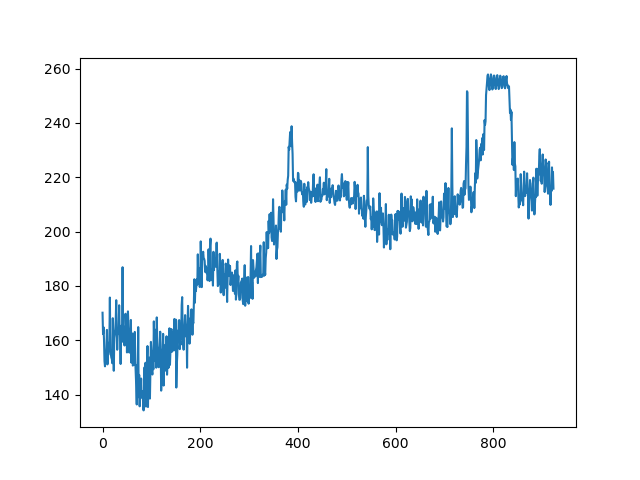

In [61]:
F, ax = plt.subplots()
ax.plot(cut_col)

In [45]:
col_transform = scipy.fft.rfft(img_array[:, 40])

In [46]:
N = img_array.shape[0]

In [47]:
col_transform.shape

(463,)

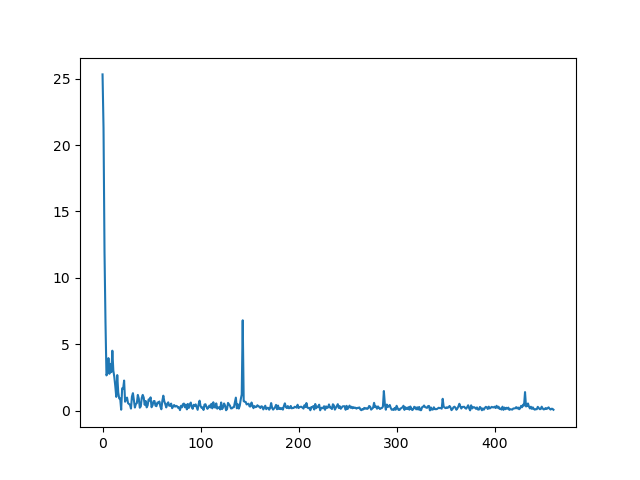

In [48]:
plt.close()
plt.plot(2.0/N * np.abs(col_transform)[1:N//2])

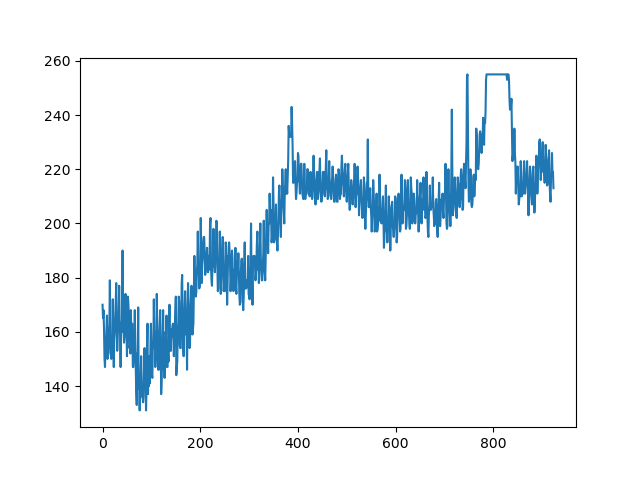

In [49]:
plt.close()
plt.plot(img_array[:, 40])

In [50]:
window = scipy.signal.windows.general_gaussian(31, 2, 2)
filt_func = np.ones(463)
filt_func[127:158] = 1 - window

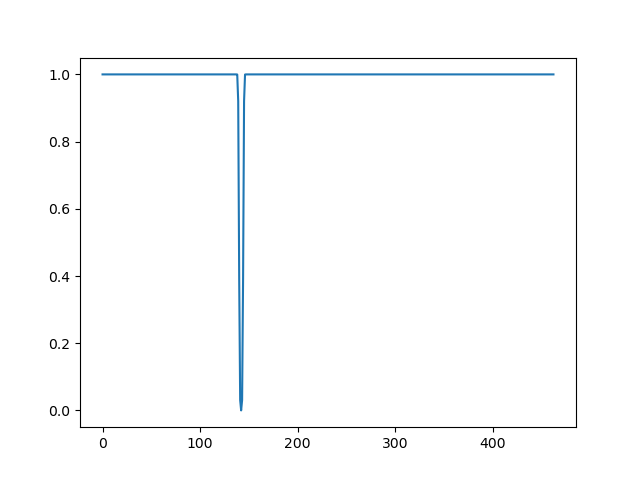

In [51]:
plt.close()
plt.plot(filt_func)

In [52]:
cut_col_transform = col_transform.copy() * filt_func

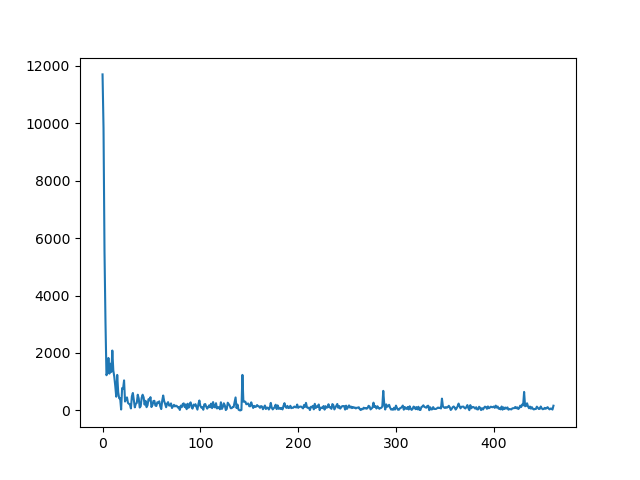

In [53]:
plt.close()
plt.plot(np.abs(cut_col_transform)[1:])

In [54]:
cut_col = scipy.fft.irfft(cut_col_transform)

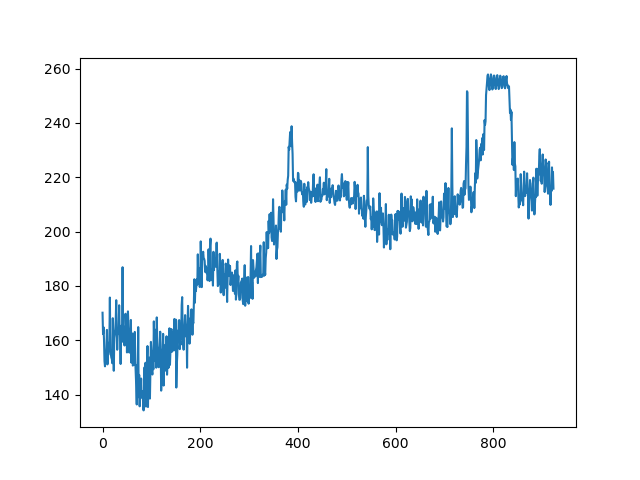

In [55]:
plt.close()
plt.plot(cut_col)